In [1]:
'''


Note that this takes the Master.xlsx file and 
splits off the T and C files and saves them as 
csv files to read in. 

files titles C_updated.csv and T_updated.csv
'''

from pandas import *
from numpy import *
from matplotlib.pyplot import *
from scipy.optimize import curve_fit
from scipy.integrate import simps
from scipy.stats import expon


Cin=read_csv('C_updated.csv',usecols=['CustomerID','EnrollmentStatus',
                            'EnrollmentDateKey','Reporting_SourceName','CustomerLastLogonDt'])

T=read_csv('T_updated.csv',usecols=['HeaderId','th_EventEndDate',
                                 'fl_Total_SalesAmount',
                                 'il_Total_SalesAmount',
                                 'flag_CrossCourt',
                                 'Loyalty_Flag','Card_First7Digits',
                                 'PhysicalMobile_Card','CustomerID'])

In [2]:
df=merge(T,Cin,how='left')

In [3]:
df['th_EventEndDate']=to_datetime(df['th_EventEndDate'],
                                    infer_datetime_format=True)
df['EnrollmentDateKey']=to_datetime(df['EnrollmentDateKey'], 
                                    format='%Y%m%d', errors='ignore')


A= df['Reporting_SourceName']=='Customer Web'
B= df['Reporting_SourceName']=='Ghost'
C= df['Reporting_SourceName']=='Customer Mobile'

In [6]:
#Question: Which channel has the most in total fuel sales?

tot_fl=df['fl_Total_SalesAmount'].sum()
web_fl=df[A]['fl_Total_SalesAmount'].sum()
G_fl=df[B]['fl_Total_SalesAmount'].sum()
Mob_fl=df[C]['fl_Total_SalesAmount'].sum()

print('Total Fuel Sales: ',tot_fl)
print('Web Enrolled Fuel Sales: ' ,web_fl, '{:.1f}% of total'.format(web_fl/tot_fl *100))
print('Mobile Enrolled Fuel Sales: ',Mob_fl,'{:.1f}% of total'.format(Mob_fl/tot_fl *100))
print('Not Enrolled Fuel Sales: ', G_fl,'{:.1f}% of total'.format(G_fl/tot_fl *100))

Total Fuel Sales:  5764378.04
Web Enrolled Fuel Sales:  1482909.32 25.7% of total
Mobile Enrolled Fuel Sales:  2005639.5299999998 34.8% of total
Not Enrolled Fuel Sales:  2264540.96 39.3% of total


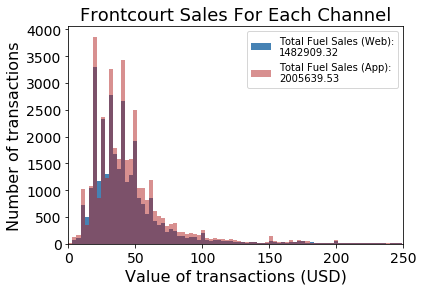

In [7]:
#Question: Which channel has the highest median fuel purchase? 

tot_fl_med=df['fl_Total_SalesAmount'].median()
Web_fl_med=df[A]['fl_Total_SalesAmount'].median()
G_fl_med=df[B]['fl_Total_SalesAmount'].median()
Mob_fl_med=df[C]['fl_Total_SalesAmount'].median()

figure()
title('Frontcourt Sales For Each Channel',fontsize=18)
hist(df[A]['fl_Total_SalesAmount'],bins=arange(0,250,3),color='steelblue',
     label='Total Fuel Sales (Web):\n{:.2f}'.format(web_fl))
hist(df[C]['fl_Total_SalesAmount'],bins=arange(0,250,3),alpha=.5,color='firebrick',
     label='Total Fuel Sales (App):\n{:.2f}'.format(Mob_fl))
legend()
xlim(0,250)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of transactions',fontsize=16)
xlabel('Value of transactions (USD)',fontsize=16)
show()

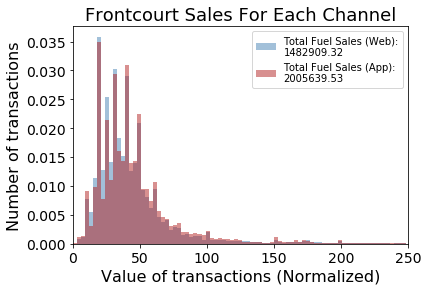

In [8]:
#Question: Which channel has the highest median fuel purchase? 

tot_fl_med=df['fl_Total_SalesAmount'].median()
Web_fl_med=df[A]['fl_Total_SalesAmount'].median()
G_fl_med=df[B]['fl_Total_SalesAmount'].median()
Mob_fl_med=df[C]['fl_Total_SalesAmount'].median()

figure()
title('Frontcourt Sales For Each Channel',fontsize=18)
hist(df[A]['fl_Total_SalesAmount'],bins=arange(0,250,3),color='steelblue',alpha=.5,
     label='Total Fuel Sales (Web):\n{:.2f}'.format(web_fl),density=True)
hist(df[C]['fl_Total_SalesAmount'],bins=arange(0,250,3),alpha=.5,color='firebrick',
     label='Total Fuel Sales (App):\n{:.2f}'.format(Mob_fl),density=True)
legend()
xlim(0,250)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of transactions',fontsize=16)
xlabel('Value of transactions (Normalized)',fontsize=16)
show()

In [9]:
#Question: Which channel has the most in total backcourt sales?

tot_il=df['il_Total_SalesAmount'].sum()
web_il=df[A]['il_Total_SalesAmount'].sum()
G_il=df[B]['il_Total_SalesAmount'].sum()
Mob_il=df[C]['il_Total_SalesAmount'].sum()

print('Total Backcourt: ',tot_il)
print('Web Enrolled Backcourt: ' ,web_il,'{:.1f}% of total'.format(web_il/tot_il *100))
print('Mobile Enrolled Backcourt: ',Mob_il,'{:.1f}% of total'.format(Mob_il/tot_il *100))
print('Not Enrolled Backcourt: ', G_il,'{:.1f}% of total'.format(G_il/tot_il *100))

Total Backcourt:  837951.15
Web Enrolled Backcourt:  190448.49000000002 22.7% of total
Mobile Enrolled Backcourt:  260858.17000000004 31.1% of total
Not Enrolled Backcourt:  385918.62000000005 46.1% of total


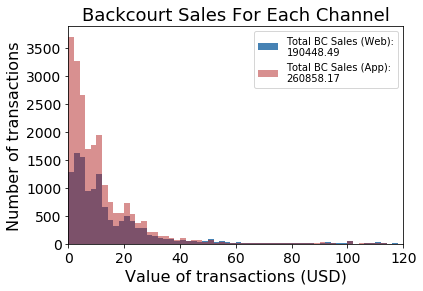

In [10]:
#Question: Which channel has the highest median backcourt purchase? 

tot_il_med=df['il_Total_SalesAmount'].median()
Web_il_med=df[A]['il_Total_SalesAmount'].median()
G_il_med=df[B]['il_Total_SalesAmount'].median()
Mob_il_med=df[C]['il_Total_SalesAmount'].median()

figure()
title('Backcourt Sales For Each Channel',fontsize=18)
hist(df[A]['il_Total_SalesAmount'],bins=arange(0,120,2),color='steelblue',
     label='Total BC Sales (Web):\n{:.2f}'.format(web_il))
hist(df[C]['il_Total_SalesAmount'],bins=arange(0,120,2),alpha=.5,color='firebrick',
     label='Total BC Sales (App):\n{:.2f}'.format(Mob_il))
legend()
xlim(0,120)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of transactions',fontsize=16)
xlabel('Value of transactions (USD)',fontsize=16)
show()

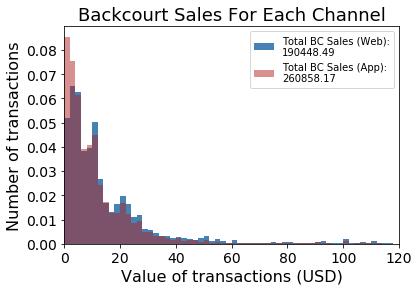

In [11]:
#Question: Which channel has the highest median backcourt purchase? 

tot_il_med=df['il_Total_SalesAmount'].median()
Web_il_med=df[A]['il_Total_SalesAmount'].median()
G_il_med=df[B]['il_Total_SalesAmount'].median()
Mob_il_med=df[C]['il_Total_SalesAmount'].median()

figure()
title('Backcourt Sales For Each Channel',fontsize=18)
hist(df[A]['il_Total_SalesAmount'],bins=arange(0,120,2),color='steelblue',
     label='Total BC Sales (Web):\n{:.2f}'.format(web_il),density=True)
hist(df[C]['il_Total_SalesAmount'],bins=arange(0,120,2),alpha=.5,color='firebrick',
     label='Total BC Sales (App):\n{:.2f}'.format(Mob_il),density=True)
legend()
xlim(0,120)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of transactions',fontsize=16)
xlabel('Value of transactions (USD)',fontsize=16)
show()

In [12]:
#How does total revenue behave with channel?

print('Total Revenue: ',tot_il+tot_fl)
print('Web Enrolled : ' ,web_il+web_fl,'{:.1f}% of total'.format((web_il+web_fl)/(tot_il+tot_fl) *100))
print('Mobile Enrolled : ',Mob_il+Mob_fl,'{:.1f}% of total'.format((Mob_il+Mob_fl)/(tot_il+tot_fl) *100))
print('Not Enrolled : ', G_il+G_fl,'{:.1f}% of total'.format((G_il+G_fl)/(tot_il+tot_fl) *100))

Total Revenue:  6602329.19
Web Enrolled :  1673357.81 25.3% of total
Mobile Enrolled :  2266497.6999999997 34.3% of total
Not Enrolled :  2650459.58 40.1% of total


In [13]:
#Qestion: Which Channel enrolls more customers?
num_cust_W=shape(df[A]['CustomerID'].unique())[0]
num_cust_M=shape(df[C]['CustomerID'].unique())[0]

print('Customers Enrolled via Web: ',num_cust_W)
print('Customers Enrolled via App: ',num_cust_M)

Customers Enrolled via Web:  5678
Customers Enrolled via App:  5442


In [14]:
#Qestion: Which Channel has most total transactions?
num_T=df.shape[0]
num_W=df[A].shape[0]
num_G=df[B].shape[0]
num_M=df[C].shape[0]

print('Total Transactions:\t',num_T)
print('Transactions from Customers Enrolled via Web:\t',num_W)
print('Transactions from Customers Enrolled via App:\t',num_M)
print('Transactions from Customers Not Enrolled:\t',num_G)

Total Transactions:	 151836
Transactions from Customers Enrolled via Web:	 36192
Transactions from Customers Enrolled via App:	 49459
Transactions from Customers Not Enrolled:	 65883


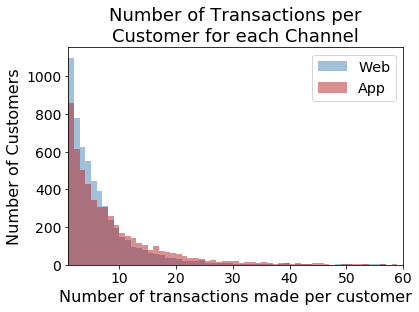

In [16]:
#Question: Which Channel's customers have more transactions? 

figure()
title('Number of Transactions per\nCustomer for each Channel',fontsize=18)
hist(value_counts(df[A]['CustomerID'].values),
                    bins=arange(1,60,1),color='steelblue',alpha=.5,
                    label='Web')
hist(value_counts(df[C]['CustomerID'].values),
                    bins=arange(1,60,1),alpha=.5,
                    color='firebrick',label='App')
xlim(1,60)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Customers',fontsize=16)
xlabel('Number of transactions made per customer',fontsize=16)
show()

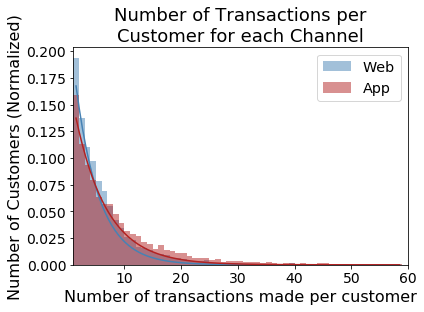

In [17]:
#Question: Which Channel's customers have more transactions? 

figure()
title('Number of Transactions per\nCustomer for each Channel',fontsize=18)
nW,binsW,patch=hist(value_counts(df[A]['CustomerID'].values),
                    bins=arange(1,60,1),color='steelblue',alpha=.5,
                    label='Web',density=True)
nM,binsM,patch=hist(value_counts(df[C]['CustomerID'].values),
                    bins=arange(1,60,1),alpha=.5,
                    color='firebrick',label='App',density=True)
xlim(1,60)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Customers (Normalized)',fontsize=16)
xlabel('Number of transactions made per customer',fontsize=16)
lamW,covW=curve_fit(lambda x,b: (b**-1)*exp(-x/b),.5*(binsW[1:]+binsW[:-1]),nW)
lamM,covM=curve_fit(lambda x,b: (b**-1)*exp(-x/b),.5*(binsM[1:]+binsM[:-1]),nM)
xplt=linspace(.5*(binsW[1]+binsW[0]),.5*(binsW[-2]+binsW[-1]),100)
plot(xplt,exp(-xplt/lamW)/lamW,color='steelblue')
plot(xplt,exp(-xplt/lamM)/lamM,color='firebrick')
show()

In [18]:
print('Average number of purchase from Web enrolled'+ 
      'customer: {:.2f} +/- {:.2f}'.format(lamW[0],sqrt(covW[0][0])))
print('Average number of purchase from App enrolled'+ 
      'customer: {:.2f} +/- {:.2f}'.format(lamM[0],sqrt(covM[0][0])))
Wpdf=expon(loc=0,scale=lamW)
Mpdf=expon(loc=0,scale=lamM)
for s in [2,5,10]:
    x=linspace(s,100,1000)
    print('Percentage of customers having more than {} transactions:'.format(s))
    print('Web enrolled: {:.2f}%'.format(simps(Wpdf.pdf(x),x=x)*100))
    print('Mobile enrolled: {:.2f}%'.format(simps(Mpdf.pdf(x),x=x)*100))

Average number of purchase from Web enrolledcustomer: 4.17 +/- 0.18
Average number of purchase from App enrolledcustomer: 5.57 +/- 0.18
Percentage of customers having more than 2 transactions:
Web enrolled: 61.90%
Mobile enrolled: 69.81%
Percentage of customers having more than 5 transactions:
Web enrolled: 30.15%
Mobile enrolled: 40.72%
Percentage of customers having more than 10 transactions:
Web enrolled: 9.09%
Mobile enrolled: 16.58%


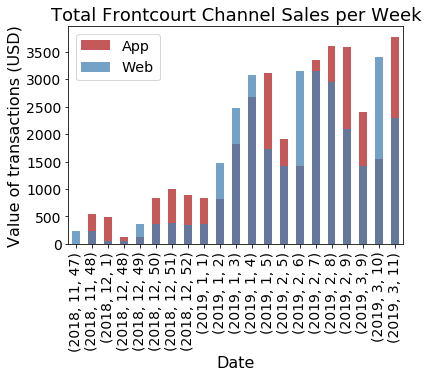

In [32]:
#Question: What is the time history of transactions for the channels?


df[C]['fl_Total_SalesAmount'].groupby([df[C]["th_EventEndDate"].dt.year,
   df[C]["th_EventEndDate"].dt.month,df[C]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='firebrick',alpha=.75,label='App')
df[A]['fl_Total_SalesAmount'].groupby([df[A]["th_EventEndDate"].dt.year,
   df[A]["th_EventEndDate"].dt.month,df[A]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='steelblue',alpha=.75,label='Web')
title('Total Frontcourt Channel Sales per Week',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Value of transactions (USD)',fontsize=16)
xlabel('Date',fontsize=16)
show()


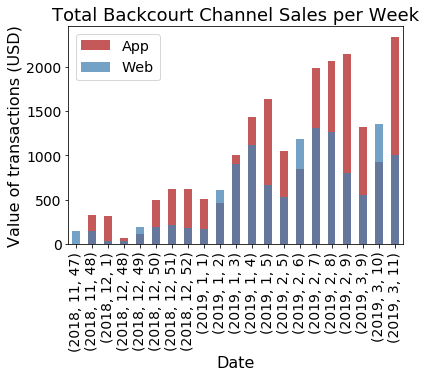

In [33]:
#Question: What is the time history of transactions for the channels?


df[C]['il_Total_SalesAmount'].groupby([df[C]["th_EventEndDate"].dt.year,
   df[C]["th_EventEndDate"].dt.month,df[C]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='firebrick',alpha=.75,label='App')
df[A]['il_Total_SalesAmount'].groupby([df[A]["th_EventEndDate"].dt.year,
   df[A]["th_EventEndDate"].dt.month,df[A]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='steelblue',alpha=.75,label='Web')
title('Total Backcourt Channel Sales per Week',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Value of transactions (USD)',fontsize=16)
xlabel('Date',fontsize=16)
show()


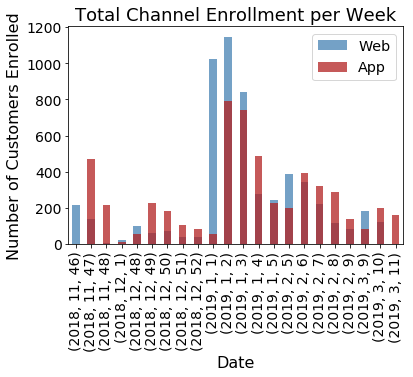

In [20]:
#Question: How many customers are enrolled as a function of time? 

en_dat=[]
for ID in df[A]['CustomerID'].unique():
    D=df[A]['CustomerID']==ID
    en_dat.append(amin(df[A][D]["th_EventEndDate"]))
    
df1W=DataFrame(en_dat,columns=['enroll_date'])

en_dat=[]
for ID in df[C]['CustomerID'].unique():
    D=df[C]['CustomerID']==ID
    en_dat.append(amin(df[C][D]["th_EventEndDate"]))

df1M=DataFrame(en_dat,columns=['enroll_date'])


df1W['enroll_date'].groupby([df1W['enroll_date'].dt.year,
   df1W['enroll_date'].dt.month,df1W['enroll_date'].dt.week]
    ).count().plot(kind="bar",color='steelblue',alpha=.75,label='Web')

df1M['enroll_date'].groupby([df1M['enroll_date'].dt.year,
   df1M['enroll_date'].dt.month,df1M['enroll_date'].dt.week]
    ).count().plot(kind="bar",color='firebrick',alpha=.75,label='App')

title('Total Channel Enrollment per Week',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Customers Enrolled',fontsize=16)
xlabel('Date',fontsize=16)
show()

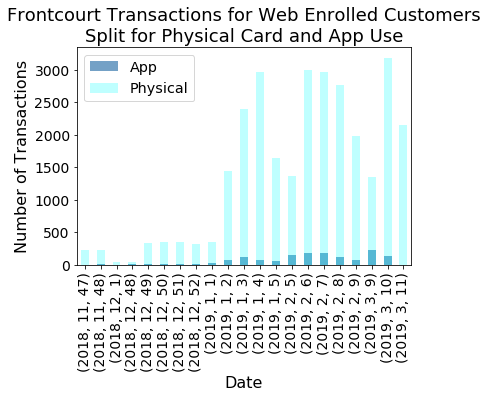

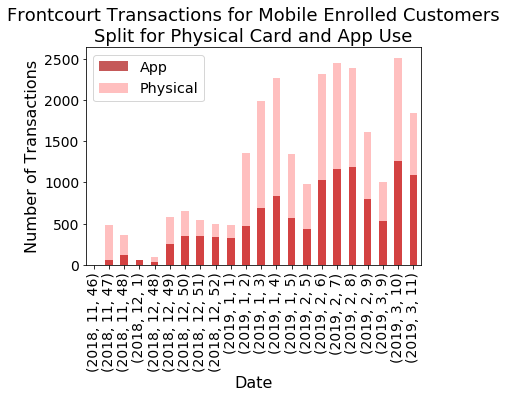

In [26]:
#How often are physical cards used in frontcourt vs app and does it vary with channel? 

AM= df[A]['PhysicalMobile_Card']=='MobileApp'
AP= df[A]['PhysicalMobile_Card']=='PhysicalCard'


figure()
df[A][AM]['fl_Total_SalesAmount'].groupby([df[A][AM]["th_EventEndDate"].dt.year,
   df[A][AM]["th_EventEndDate"].dt.month,df[A][AM]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='steelblue',alpha=.75,label='App')
df[A][AP]['fl_Total_SalesAmount'].groupby([df[A][AP]["th_EventEndDate"].dt.year,
   df[A][AP]["th_EventEndDate"].dt.month,df[A][AP]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='cyan',alpha=.25,label='Physical')
title('Frontcourt Transactions for Web Enrolled Customers\nSplit for'+ 
      ' Physical Card and App Use',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Transactions',fontsize=16)
xlabel('Date',fontsize=16)
show()

CM= df[C]['PhysicalMobile_Card']=='MobileApp'
CP= df[C]['PhysicalMobile_Card']=='PhysicalCard'

figure()
df[C][CM]['fl_Total_SalesAmount'].groupby([df[C][CM]["th_EventEndDate"].dt.year,
   df[C][CM]["th_EventEndDate"].dt.month,df[C][CM]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='firebrick',alpha=.75,label='App')
df[C][CP]['fl_Total_SalesAmount'].groupby([df[C][CP]["th_EventEndDate"].dt.year,
   df[C][CP]["th_EventEndDate"].dt.month,df[C][CP]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='red',alpha=.25,label='Physical')
title('Frontcourt Transactions for Mobile Enrolled Customers\nSplit for'+ 
      ' Physical Card and App Use',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Transactions',fontsize=16)
xlabel('Date',fontsize=16)
show()

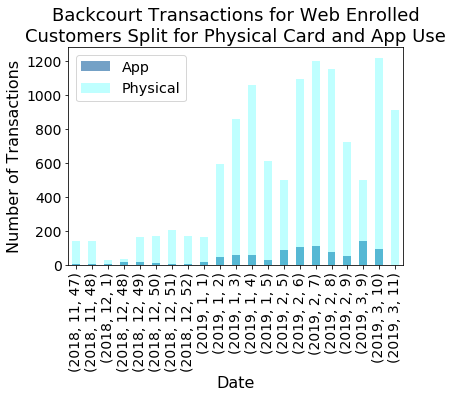

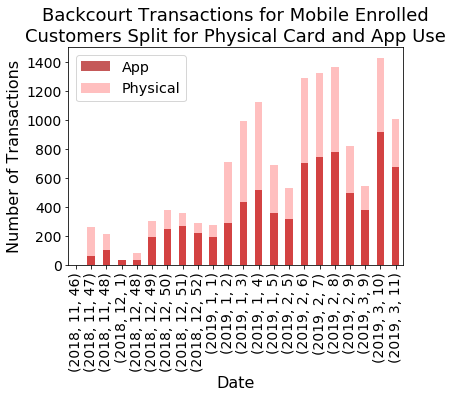

In [53]:
#How often are physical cards used in backcourt vs app and does it vary with channel?

figure()
df[A][AM]['il_Total_SalesAmount'].groupby([df[A][AM]["th_EventEndDate"].dt.year,
   df[A][AM]["th_EventEndDate"].dt.month,df[A][AM]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='steelblue',alpha=.75,label='App')
df[A][AP]['il_Total_SalesAmount'].groupby([df[A][AP]["th_EventEndDate"].dt.year,
   df[A][AP]["th_EventEndDate"].dt.month,df[A][AP]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='cyan',alpha=.25,label='Physical')
title('Backcourt Transactions for Web Enrolled\nCustomers Split for'+ 
      ' Physical Card and App Use',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Transactions',fontsize=16)
xlabel('Date',fontsize=16)
show()

figure()
df[C][CM]['il_Total_SalesAmount'].groupby([df[C][CM]["th_EventEndDate"].dt.year,
   df[C][CM]["th_EventEndDate"].dt.month,df[C][CM]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='firebrick',alpha=.75,label='App')
df[C][CP]['il_Total_SalesAmount'].groupby([df[C][CP]["th_EventEndDate"].dt.year,
   df[C][CP]["th_EventEndDate"].dt.month,df[C][CP]["th_EventEndDate"].dt.week]
    ).count().plot(kind="bar",color='red',alpha=.25,label='Physical')
title('Backcourt Transactions for Mobile Enrolled\nCustomers Split for'+ 
      ' Physical Card and App Use',fontsize=18)
legend(fontsize='x-large')
xticks(fontsize=14)
yticks(fontsize=14)
ylabel('Number of Transactions',fontsize=16)
xlabel('Date',fontsize=16)
show()

In [27]:
#How many customers used the physical card and app both?
M= df['PhysicalMobile_Card']=='MobileApp'
P= df['PhysicalMobile_Card']=='PhysicalCard'

num_app_user=len(df[M]['CustomerID'].unique())
num_card_user=len(df[P]['CustomerID'].unique())

num_both_user=len(intersect1d(df[M]['CustomerID'].unique(),
                              df[P]['CustomerID'].unique()))

tot_user=(num_app_user+num_card_user-num_both_user)

print('Total number of users: ',tot_user)
print('Number of customers using App: ',num_app_user)
print('Number of customers using Card: ',num_card_user)
print('Number of customers using both:',num_both_user,)
print('Percentage of customers who use only App: {:.2f}%'.format((num_app_user-num_both_user)/tot_user * 100))

Total number of users:  37696
Number of customers using App:  3112
Number of customers using Card:  36806
Number of customers using both: 2222
Percentage of customers who use only App: 2.36%


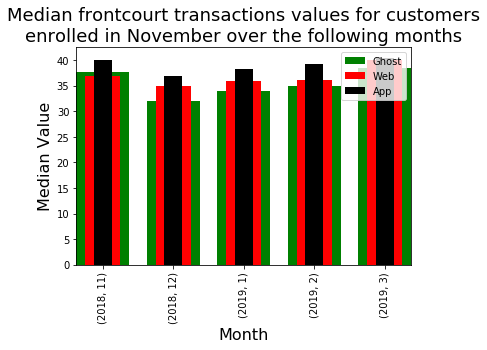

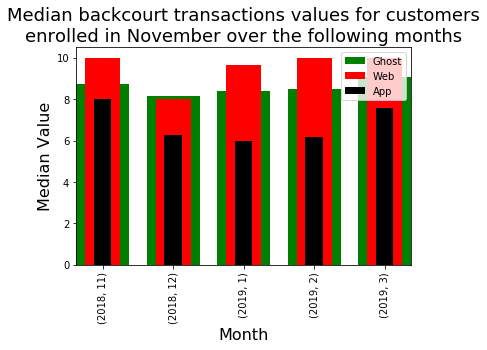

In [48]:
#What is the median purchase price for backcourt and frontcourt purchases?
def mon_trans_med(dfs,cat='fl_Total_SalesAmount',month=11,col='k',wid=.5,lab=''):
    Mon=dfs['EnrollmentDateKey'].dt.month==month
    M=dfs[Mon][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).median()
    M.plot(kind='bar',color=col,width=wid,label=lab)
    
figure()
title('Median frontcourt transactions values for customers\nenrolled in November over the following months',fontsize=18)
mon_trans_med(df[TG],month=Month_plot,col='green',wid=.75,lab='Ghost')
mon_trans_med(df[TW],month=Month_plot,col='red',wid=.5,lab='Web')
mon_trans_med(df[TM],month=Month_plot,col='k',wid=.25,lab='App')
xlabel('Month',fontsize=16)
ylabel('Median Value',fontsize=16)
legend()
show()

figure()
title('Median backcourt transactions values for customers\nenrolled in November over the following months',fontsize=18)
mon_trans_med(df[TG],month=Month_plot,cat='il_Total_SalesAmount',col='green',wid=.75,lab='Ghost')
mon_trans_med(df[TW],month=Month_plot,cat='il_Total_SalesAmount',col='red',wid=.5,lab='Web')
mon_trans_med(df[TM],month=Month_plot,cat='il_Total_SalesAmount',col='k',wid=.25,lab='App')
xlabel('Month',fontsize=16)
ylabel('Median Value',fontsize=16)
legend()
show()

In [17]:
#Feedback part 1 and 2 plot generating function. 

def num_and_rev(card='MobileApp',CC=0,court='front'):
    CD=df['PhysicalMobile_Card']==card
    CCT=df['flag_CrossCourt']==CC
    figure()
    title(card +' '+ court+' court')
    for zt,mk,cl in zip(['Customer Web','Customer Mobile','Ghost'],
                        ['x','*','+'],['k','b','r']):
        A= df['Reporting_SourceName']==zt
        df_temp=df[A*CD*CCT]
        rev=[]
        cnt=[]
        for ch in df_temp['CustomerID'].unique():
            Q=df_temp['CustomerID']==ch
            df_tt=df_temp[Q]
            if court=='back':
                cnt.append(df_tt['il_Total_SalesAmount'].count())
                rev.append(df_tt['il_Total_SalesAmount'].sum())
            if court=='front':
                cnt.append(df_tt['fl_Total_SalesAmount'].count())
                rev.append(df_tt['fl_Total_SalesAmount'].sum())
            if court=='both':
                cnt.append(df_tt['il_Total_SalesAmount'].count()+
                           df_tt['fl_Total_SalesAmount'].count())
                rev.append(df_tt['il_Total_SalesAmount'].sum()+
                           df_tt['fl_Total_SalesAmount'].sum())
        plot(cnt,rev,'o',label=zt+'\nNumber of Customers: {}'.format(len(cnt)),
             alpha=.6,marker=mk,color=cl)
    legend()
    xlabel('Number of Transactions',fontsize=16)
    ylabel('Total Revenue (USD)',fontsize=16)
    show()

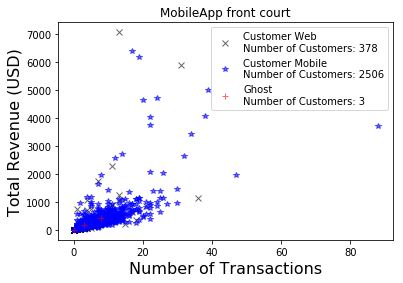

In [20]:
#example of above plot maker

num_and_rev()




In [43]:
# Histogram of number of transactions per customer for different categories. 
def num_hist(card='MobileApp',CC=0,court='front'):
    CD=df['PhysicalMobile_Card']==card
    CCT=df['flag_CrossCourt']==CC
    b=[1,2,3,4,5,6,7,8,9,10,12,15,20,50]
    wid=[1,1,1,1,1,1,1,1,1,1,2,3,5,30]
    tfm=0
    figure()
    if card=='MobileApp':
        L=['Customer Mobile','Customer Web','Ghost']
        CL=['k','b','r']
    else:
        L=['Ghost','Customer Mobile','Customer Web']
        CL=['r','k','b']
    for zt,cl in zip(L,CL):
        A= df['Reporting_SourceName']==zt
        df_temp=df[A*CD*CCT]
        cnt=[]
        for ch in df_temp['CustomerID'].unique():
            Q=df_temp['CustomerID']==ch
            df_tt=df_temp[Q]
            if court=='back':
                cnt.append(df_tt['il_Total_SalesAmount'].count())
            if court=='front':
                cnt.append(df_tt['fl_Total_SalesAmount'].count())
            if court=='both':
                cnt.append(df_tt['il_Total_SalesAmount'].count()+
                           df_tt['fl_Total_SalesAmount'].count())

        cntf=[]
        totf=[]
        cnt=array(cnt)
        cntf.append(.5)
        totf.append(len(df[~df['CustomerID'].isin(
                df_temp['CustomerID'].unique())]['CustomerID'].unique()))
        for i in range(len(b)-1):
            a=cnt>=b[i]
            c=cnt<b[i+1]
            cntf.append((b[i]+b[i+1])/2)
            totf.append(len(cnt[a*c]))
        if amax(totf[1:])>tfm:
            tfm=amax(totf[1:])
        bar(cntf,totf,width=wid,edgecolor='black',color=cl,alpha=.5,
            label=zt+'\nMean number of transactions '+
             '{:.2f}\nTotal Number of Customers {}'.format(mean(cnt),len(cnt))
             +'\nNumber of 0 transaction customers {}'.format(totf[0]))
    title(card +' '+ court+' court'+' Crosscourt='+str(CC))
    legend()
    xticks([0]+b)
    xlabel('Number of Transactions',fontsize=16)
    ylabel('Number of Customers',fontsize=16)
    ylim(0,tfm+100)
    show()

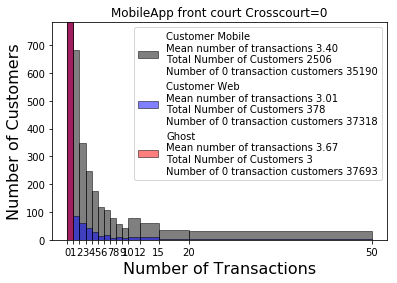

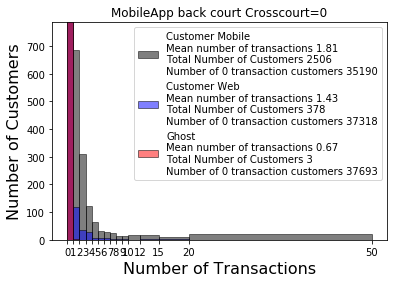

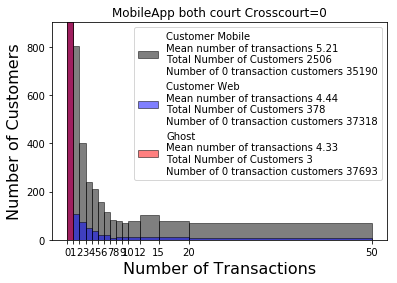

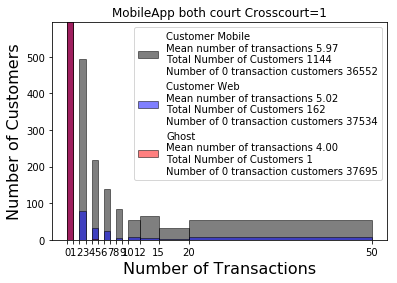

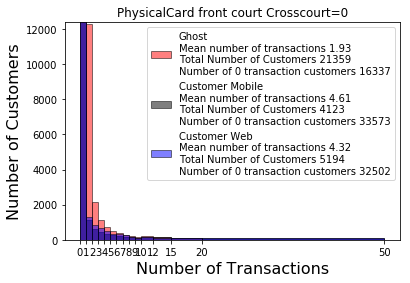

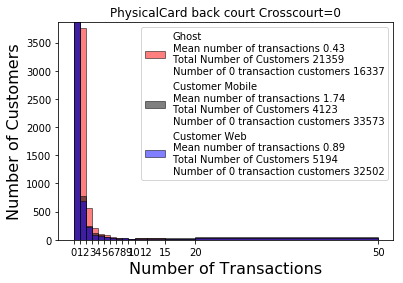

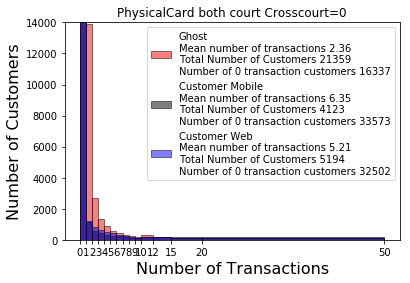

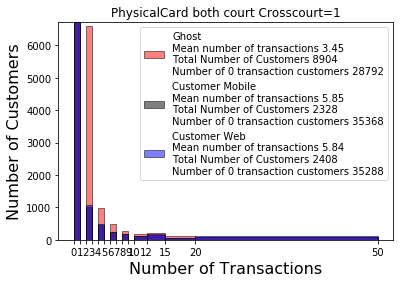

In [44]:
#Run for different configurations (generates 8 different plots.)
for crd in ['MobileApp','PhysicalCard']:
    for crt in ['front','back','both']:
        if crt=='both':
            for crct in [0,1]:
                num_hist(card=crd,CC=crct,court=crt)
        else:
            num_hist(card=crd,CC=0,court=crt)


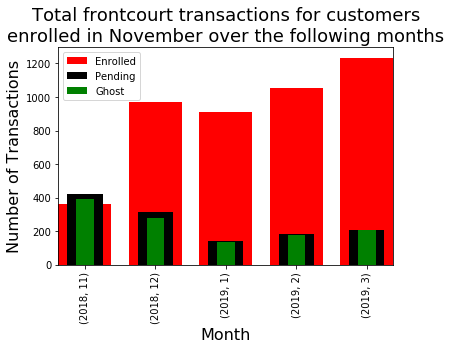

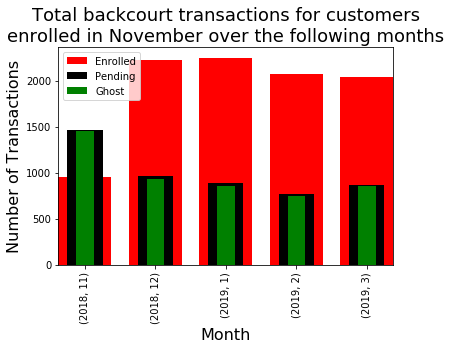

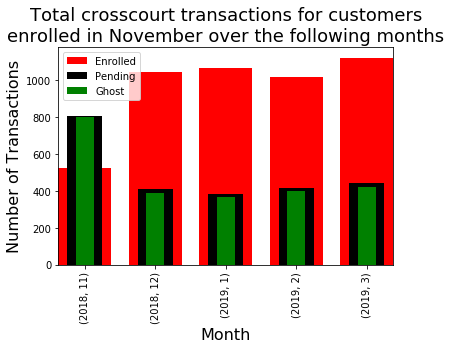

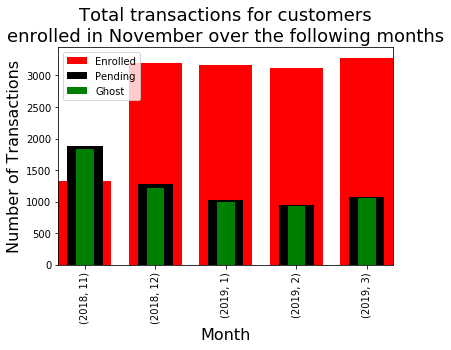

In [14]:
#Transactional Info
#What is the transaction behavior like for different categories of customers on a monthly basis? 

P=df['EnrollmentStatus']=='Pending Completion'
E=df['EnrollmentStatus']=='Enrolled'
G=df['Reporting_SourceName']=='Ghost'

#directory all data will be saved in
directory='trans_time_series_data'

import os
if not os.path.exists(directory):
    os.makedirs(directory)

def mon_trans(dfs,month=11,col='k',wid=.5,lab='',trans='both',CC=0):
    CCT=dfs['flag_CrossCourt']==CC
    if trans=='both':
        cat='CustomerID'
    if trans=='front':
        cat='il_Total_SalesAmount'
    if trans=='back':
        cat='fl_Total_SalesAmount'
    Mon=dfs[CCT]['EnrollmentDateKey'].dt.month==month
    M=dfs[CCT][Mon][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).count()
    M.iloc[-1]*=2
    M.plot(kind='bar',color=col,width=wid,label=lab)
    M.to_csv(directory+'/'+lab+'_'+trans+'_month_'+str(month)+'_trans.csv')




#To plot different months change value of Month_plot to desired month (e.g. 12 for December)
Month_plot=11 #November


months={
    '11' : 'November',
    '12' : 'December',
    '1' : 'January',
    '2' : 'February',
    '3' : 'March'}


#Frontcourt
figure()
title('Total frontcourt transactions for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_trans(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='front')
mon_trans(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='front')
mon_trans(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='front')
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()

#Backcourt
figure()
title('Total backcourt transactions for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_trans(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='back')
mon_trans(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='back')
mon_trans(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='back')
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()

#Crosscourt
figure()
title('Total crosscourt transactions for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_trans(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='both',CC=1)
mon_trans(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='both',CC=1)
mon_trans(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='both',CC=1)
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()

#Total
figure()
title('Total transactions for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_trans(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='both')
mon_trans(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='both')
mon_trans(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='both')
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()

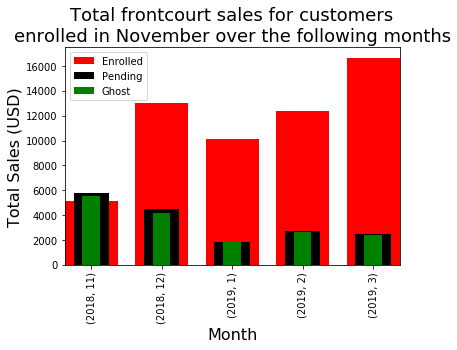

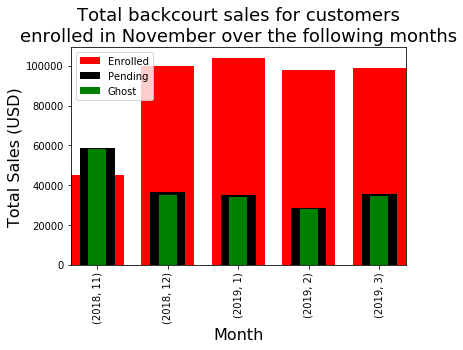

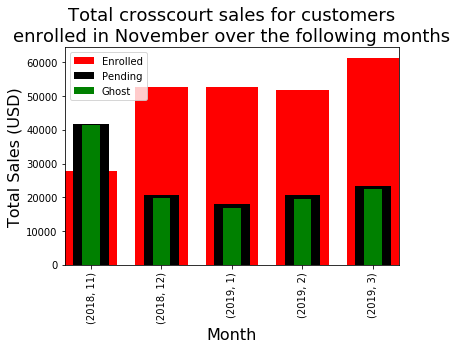

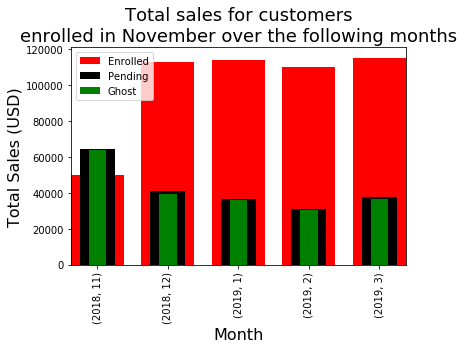

In [15]:
#What is the sales behavior like for different categories of customers on a monthly basis? 


def mon_sales(dfs,month=11,col='k',wid=.5,lab='',trans='both',CC=0):
    CCT=dfs['flag_CrossCourt']==CC
    if trans=='both':
        cat1='il_Total_SalesAmount'
        cat2='fl_Total_SalesAmount'
        Mon=dfs[CCT]['EnrollmentDateKey'].dt.month==month
        M1=dfs[CCT][Mon][cat1].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
        M2=dfs[CCT][Mon][cat2].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
        M=M1+M2
        
    if trans=='front':
        cat='il_Total_SalesAmount'
        Mon=dfs[CCT]['EnrollmentDateKey'].dt.month==month
        M=dfs[CCT][Mon][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
    if trans=='back':
        cat='fl_Total_SalesAmount'
        Mon=dfs[CCT]['EnrollmentDateKey'].dt.month==month
        M=dfs[CCT][Mon][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
    M.iloc[-1]*=2
    M.plot(kind='bar',color=col,width=wid,label=lab)
    M.to_csv(directory+'/'+lab+'_'+trans+'_month_'+str(month)+'_sales.csv')




#To plot different months change value of Month_plot to desired month (e.g. 12 for December)
Month_plot=11 #November


months={
    '11' : 'November',
    '12' : 'December',
    '1' : 'January',
    '2' : 'February',
    '3' : 'March'}


#Frontcourt
figure()
title('Total frontcourt sales for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_sales(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='front')
mon_sales(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='front')
mon_sales(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='front')
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()

#Backcourt
figure()
title('Total backcourt sales for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_sales(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='back')
mon_sales(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='back')
mon_sales(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='back')
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()

#Crosscourt
figure()
title('Total crosscourt sales for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_sales(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='both',CC=1)
mon_sales(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='both',CC=1)
mon_sales(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='both',CC=1)
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()

#Total
figure()
title('Total sales for customers\nenrolled in {} over the following months'.format(
    months[str(Month_plot)]),fontsize=18)
mon_sales(df[E],month=Month_plot,col='red',wid=.75,lab='Enrolled',trans='both')
mon_sales(df[P],month=Month_plot,col='k',wid=.5,lab='Pending',trans='both')
mon_sales(df[G],month=Month_plot,col='green',wid=.25,lab='Ghost',trans='both')
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()

In [35]:
#Apriori Algorithm for transactions. 

BC_T=len(df[~df['il_Total_SalesAmount'].isna()])
FC_T=len(df[~df['fl_Total_SalesAmount'].isna()])
Tot_T=FC_T+BC_T
CC_T=len(df[df['flag_CrossCourt']==1])

#Support describes the fraction of transactions that frontcourt and backcourt sales make-up. 
sup_B=BC_T/Tot_T 
sup_F=FC_T/Tot_T

#Confidence F -> B describes the fraction of frontcourt purchases that also result in a backcourt purchase. 
con_FB=CC_T/FC_T

#Lift B describes how likely a backcourt purchase will happen in combination with a frotncourt purchase
#compared to when a backcourt purchase is made alone. A number < 1 means that it is more likely that
#backcourt purchases are made seperately, and a number >1 means that backcourt purchases are more
#likely to happen with a frontcourt purchase. 

Lift_B=con_FB/sup_B

print('Total Frontcourt Transactions = {}'.format(FC_T))
print('Total Backcourt Transactions = {}'.format(BC_T))
print('Total Crosscourt Transactions = {}'.format(CC_T))
print('\n************************')
print('* Apriori Calculations *')
print('************************\n')
print('Support of Backcourt = {:.2f}'.format(sup_B))
print('Support of Frontcourt = {:.2f}'.format(sup_F))
print('Confidence of Frontcourt -> Backcourt = {:.2f}'.format(con_FB))
print('Lift of Backcourt = {:.2f}'.format(Lift_B))



Total Frontcourt Transactions = 395855
Total Backcourt Transactions = 391302
Total Crosscourt Transactions = 110746

************************
* Apriori Calculations *
************************

Support of Backcourt = 0.50
Support of Frontcourt = 0.50
Confidence of Frontcourt -> Backcourt = 0.28
Lift of Backcourt = 0.56


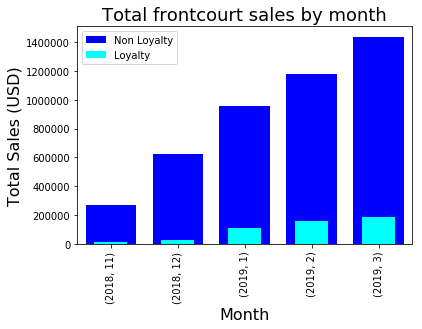

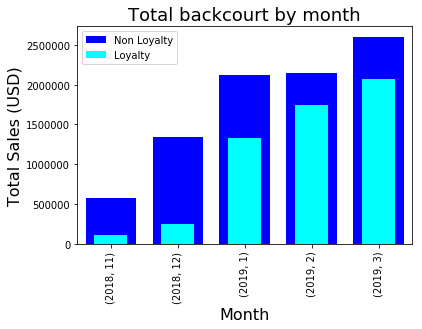

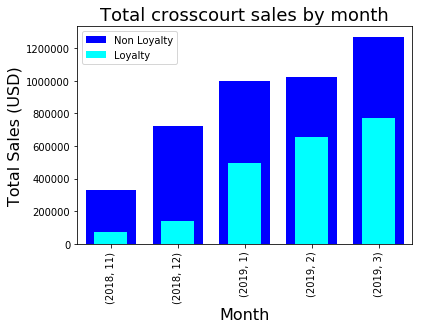

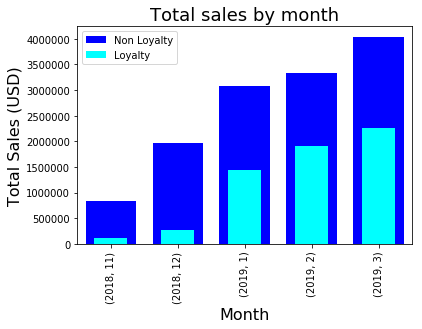

In [16]:
#Transactional Analysis for Loyalty vs. Not Loyalty Sales. 

L=df['Loyalty_Flag']==1
NL=df['Loyalty_Flag']==0

def mon_sales_LvNL(dfs,col='k',wid=.5,lab='',trans='both',CC=0):
    CCT=dfs['flag_CrossCourt']==CC
    if trans=='both':
        cat1='il_Total_SalesAmount'
        cat2='fl_Total_SalesAmount'
        M1=dfs[CCT][cat1].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
        M2=dfs[CCT][cat2].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
        M=M1+M2
        
    if trans=='front':
        cat='il_Total_SalesAmount'
        M=dfs[CCT][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
    if trans=='back':
        cat='fl_Total_SalesAmount'
        M=dfs[CCT][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).sum()
    M.iloc[-1]*=2
    M.plot(kind='bar',color=col,width=wid,label=lab)
    M.to_csv(directory+'/'+lab+'_'+trans+'_sales.csv')


    
#Total
figure()
title('Total frontcourt sales by month',fontsize=18)
mon_sales_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='front')
mon_sales_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='front')
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()

#Backcourt
figure()
title('Total backcourt by month',fontsize=18)
mon_sales_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='back')
mon_sales_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='back')
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()    

#Crosscourt
figure()
title('Total crosscourt sales by month',fontsize=18)
mon_sales_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='both',CC=1)
mon_sales_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='both',CC=1)
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()
    
#Total
figure()
title('Total sales by month',fontsize=18)
mon_sales_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='both')
mon_sales_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='both')
xlabel('Month',fontsize=16)
ylabel('Total Sales (USD)',fontsize=16)
legend()
show()

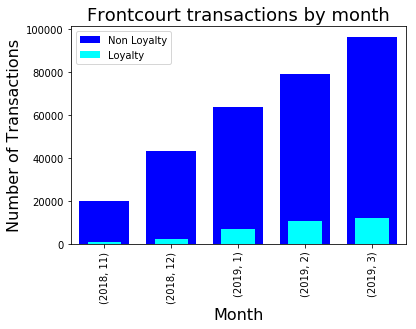

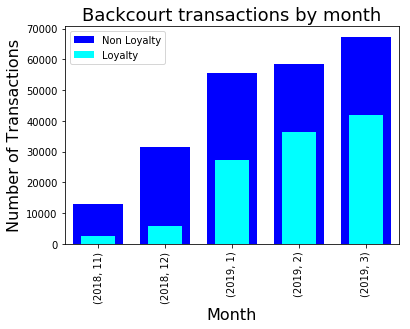

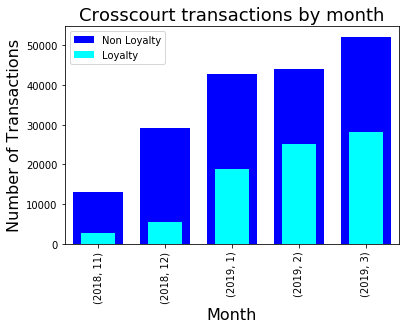

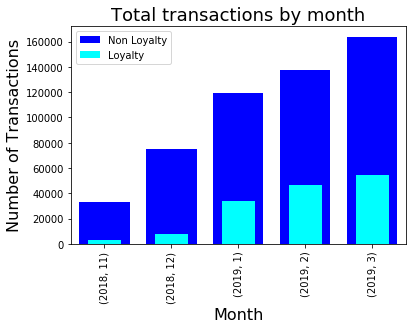

In [17]:
def mon_trans_LvNL(dfs,col='k',wid=.5,lab='',trans='both',CC=0):
    CCT=dfs['flag_CrossCourt']==CC
    if trans=='both':
        cat1='il_Total_SalesAmount'
        cat2='fl_Total_SalesAmount'
        M1=dfs[CCT][cat1].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).count()
        M2=dfs[CCT][cat2].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).count()
        M=M1+M2
        
    if trans=='front':
        cat='il_Total_SalesAmount'
        M=dfs[CCT][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).count()
    if trans=='back':
        cat='fl_Total_SalesAmount'
        M=dfs[CCT][cat].groupby([dfs["th_EventEndDate"].dt.year,
                                 dfs["th_EventEndDate"].dt.month]).count()
    M.iloc[-1]*=2
    M.plot(kind='bar',color=col,width=wid,label=lab)
    M.to_csv(directory+'/'+lab+'_'+trans+'_trans.csv')


    
#Frontcourt
figure()
title('Frontcourt transactions by month',fontsize=18)
mon_trans_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='front')
mon_trans_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='front')
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()

#Backcourt
figure()
title('Backcourt transactions by month',fontsize=18)
mon_trans_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='back')
mon_trans_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='back')
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()    

#Crosscourt
figure()
title('Crosscourt transactions by month',fontsize=18)
mon_trans_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='both',CC=1)
mon_trans_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='both',CC=1)
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()
    
#Total
figure()
title('Total transactions by month',fontsize=18)
mon_trans_LvNL(df[NL],col='blue',wid=.75,lab='Non Loyalty',trans='both')
mon_trans_LvNL(df[L],col='cyan',wid=.5,lab='Loyalty',trans='both')
xlabel('Month',fontsize=16)
ylabel('Number of Transactions',fontsize=16)
legend()
show()